In [2]:
import pandas as pd
from numpy.linalg import norm
import numpy as np

import random
from collections import defaultdict

n_connections_per_person = 10
n_people = 50_000

# value alignment for each person
d = 2
values = np.random.random((n_people, d))

results = {}

# value openness
tries = np.linspace(0.02, .3, 10)
for selectivity in tries:
    accepted = norm(values, axis=1) / np.sqrt(d) < selectivity
    user_values = values[accepted]
    n_users = len(user_values)

    def make_connections(n, n_connections_per_person):
        """
        Generate a symmetric undirected graph where each person has exactly
        `n_connections_per_person` mutual connections.

        Assumes:
        - n_connections_per_person < n
        - (n * n_connections_per_person) must be even (required for undirected graph)

        Returns:
            A dict mapping each person to a set of their connected people.
        """
        if n_connections_per_person >= n:
            raise ValueError("Each person must have fewer connections than total people.")

        if (n * n_connections_per_person) % 2 != 0:
            raise ValueError("Total number of connections must be even for mutual pairs.")

        attempts = 0
        max_attempts = 10000  # to prevent infinite loops

        while True:
            # Clear previous attempts
            connections = defaultdict(set)

            people = list(range(n))
            success = True

            for i in people:
                while len(connections[i]) < n_connections_per_person:
                    possible = list(set(people) - connections[i] - {i})
                    possible = [p for p in possible if len(connections[p]) < n_connections_per_person]
                    if not possible:
                        success = False
                        break
                    j = random.choice(possible)
                    connections[i].add(j)
                    connections[j].add(i)

                # if not success:
                #     break

            if success:
                break

            attempts += 1
            # print(attempts)
            if attempts > max_attempts:
                raise RuntimeError("Failed to generate a valid connection graph after many attempts.")

        lens = [len(x) for x in connections.values() if len(x) != n_connections_per_person]
        print(lens)
        # print(lens)
        # plt.figure(figsize=(5, 5))
        # plt.hist(lens, bins=100)
        # plt.show()

        return dict(connections)

    connections = make_connections(len(user_values), n_connections_per_person=n_connections_per_person)

    import numpy as np
    import matplotlib.pyplot as plt

    def plot_connections(connections):
        # n = len(connections)
        # angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
        # positions = {i: (np.cos(a), np.sin(a)) for i, a in enumerate(angles)}
        positions = {i: a for i, a in enumerate(user_values)}

        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xlim(0, selectivity)
        ax.set_ylim(0, selectivity)
        # ax.set_aspect('equal')
        # ax.axis('off')

        # Draw nodes
        for i, (x, y) in positions.items():
            ax.plot(x, y, 'o', color='black')
            ax.text(x * 1.05, y * 1.05, str(i), ha='center', va='center')

        # Draw edges
        drawn = set()
        for i, neighbors in connections.items():
            for j in neighbors:
                if str((j, i)) not in drawn:
                    x0, y0 = positions[i]
                    x1, y1 = positions[j]
                    ax.plot([x0, x1], [y0, y1], color='gray')
                    drawn.add(str((i, j)))

        plt.title("Connections on Unit Circle")
        plt.show()

    # plot_connections(connections)

    q = []
    for i in range(n_users):
        other_values = user_values[list(connections[i])]
        user_value = user_values[i]
        user_q = 1 - (norm(other_values - user_values[i], axis=1) / np.sqrt(d)) ** .2
        # user_q = np.exp(-10 * norm(other_values - user_value, axis=1))
        # We are utilitarian but still give more importance to like-minded people
        # (whose values are closer to the target (0, 0))
        # user_q /= norm(user_value) ** 2
        # print(user_q)
        user_q = np.clip(user_q / 10000, 0, 1)
        q.append(user_q)

    # print(connections)
    q = np.array(q)
    Q = float(q.sum().sum())
    print(n_users, 'users')
    print('Mean Q:', Q / n_users)
    print('Q:', Q)
    results[selectivity] = (Q, n_users, Q / n_users)

results

[]
32 users
Mean Q: 0.0006084262563549525
Q: 0.01946964020335848
[]
209 users
Mean Q: 0.0005338180983010117
Q: 0.11156798254491143
[]
528 users
Mean Q: 0.0004895787094351725
Q: 0.25849755858177104
[]
999 users
Mean Q: 0.00045690902684389974
Q: 0.45645211781705586
[]
1625 users
Mean Q: 0.00042897726875680336
Q: 0.6970880617298054
[]
2433 users
Mean Q: 0.00040737235242289407
Q: 0.9911369334449013
[]
3381 users
Mean Q: 0.00038626885877638686
Q: 1.305975011522964
[]
4508 users
Mean Q: 0.00036957625446330247
Q: 1.6660497551205675
[]
5833 users
Mean Q: 0.0003531213285522714
Q: 2.059756709445399
[]
7195 users
Mean Q: 0.0003393996132746142
Q: 2.441980217510849


{np.float64(0.02): (0.01946964020335848, 32, 0.0006084262563549525),
 np.float64(0.05111111111111111): (0.11156798254491143,
  209,
  0.0005338180983010117),
 np.float64(0.08222222222222221): (0.25849755858177104,
  528,
  0.0004895787094351725),
 np.float64(0.11333333333333333): (0.45645211781705586,
  999,
  0.00045690902684389974),
 np.float64(0.14444444444444443): (0.6970880617298054,
  1625,
  0.00042897726875680336),
 np.float64(0.17555555555555552): (0.9911369334449013,
  2433,
  0.00040737235242289407),
 np.float64(0.20666666666666664): (1.305975011522964,
  3381,
  0.00038626885877638686),
 np.float64(0.23777777777777773): (1.6660497551205675,
  4508,
  0.00036957625446330247),
 np.float64(0.26888888888888884): (2.059756709445399,
  5833,
  0.0003531213285522714),
 np.float64(0.3): (2.441980217510849, 7195, 0.0003393996132746142)}

In [3]:
import pandas as pd
df = pd.DataFrame(results).T
df.columns = ['Q', 'n_users', 'Q_per_user']
df.index.name = 'Selectivity'
df.index = 1 - df.index
df

,Q,n_users,Q_per_user
Selectivity,,,
0.980000,0.019470,32.0,0.000608
0.948889,0.111568,209.0,0.000534
0.917778,0.258498,528.0,0.000490
0.886667,0.456452,999.0,0.000457
0.855556,0.697088,1625.0,0.000429
0.824444,0.991137,2433.0,0.000407
0.793333,1.305975,3381.0,0.000386
0.762222,1.666050,4508.0,0.000370
0.731111,2.059757,5833.0,0.000353


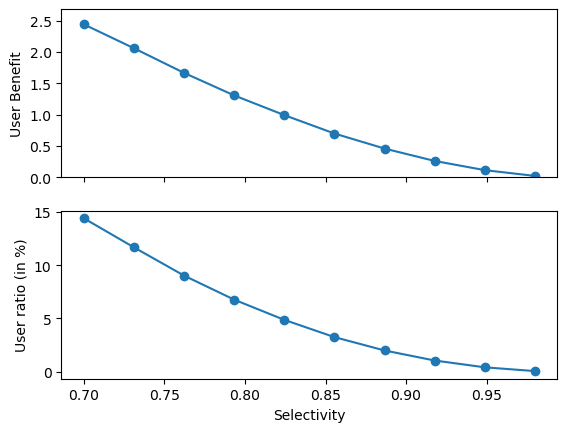

In [4]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
Q = df.iloc[:, 0]
Q.plot(ax=ax, marker='o')
ax.set_ylabel('User Benefit')
ax.set_ylim(0, Q.max() * 1.1)

x = df.iloc[:, 1] / n_people * 100
x.plot(ax=ax2, marker='o')
ax2.set_ylabel('User ratio (in %)')
# ax2.set_ylim(0, 100)
plt.show()